# **10장 – 케라스를 사용한 인공 신경망 소개**

# 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지와 텐서플로 버전이 2.0 이상인지 확인합니다.

In [3]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 퍼셉트론

**노트**: 사이킷런 향후 버전에서 `max_iter`와 `tol` 매개변수의 기본값이 바뀌기 때문에 경고를 피하기 위해 명시적으로 지정합니다.

In [4]:
# 퍼셉트론 거의 사용 안함 

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)  # setosa==1,   non-setosa==0 으로 라벨링

#per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

그림 저장: perceptron_iris_plot


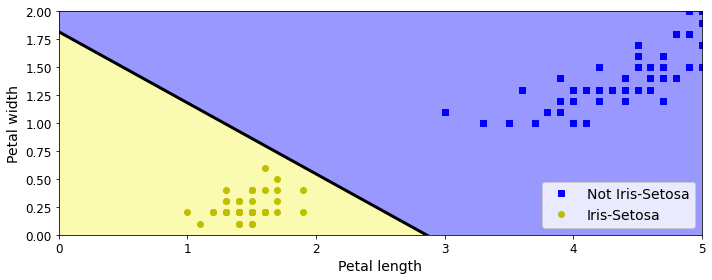

In [6]:
# 결정경계 시각화

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# 활성화 함수

In [ ]:
# 활성화 함수 -> 미분을 가능하도록 하는 함수 
# 미분하면 그래프의 결과를 부드럽게 할 수 있음 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

그림 저장: activation_functions_plot


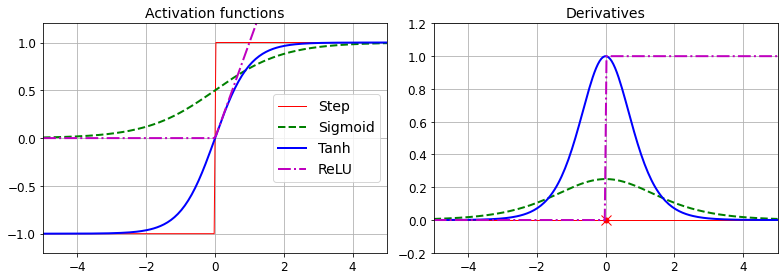

In [ ]:
# 왼쪽 그래프 = step뺀 나머지는 미분 가능해서 요즘 쓰임
# step: 0에서 조금만 값이 변하면 결과 다르게 나옴 -> gradiant 못함 -> 
# tanh : step보다 그래프가 부드러워서 결과 더 좋게 나옴 -> gradiant 가능
# 오른쪽 그래프 = 각각을 미분한것을 보여준다. 

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

# XOR 문제를 해결한 예 : 학습은 아님

In [ ]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

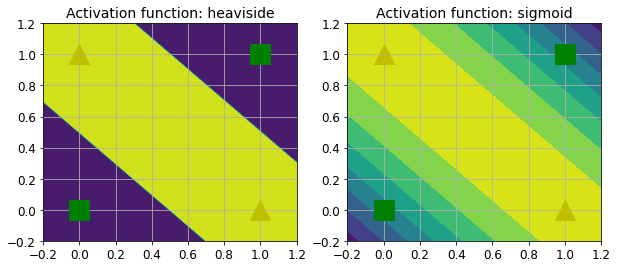

In [ ]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Sequential API : 간단한 프로그램
Layer를 순서적으로 연결 : 대부분 가능. 복잡한 것은 안됨

먼저 텐서플로와 케라스를 임포트합니다.

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
tf.__version__

'2.3.0'

In [10]:
keras.__version__

'2.4.0'

### 분류 MLP : fasion NMIST

케라스는 `keras.datasets`에 널리 사용하는 데이터셋을 로드하기 위한 함수를 제공합니다. 이 데이터셋은 이미 훈련 세트와 테스트 세트로 나누어져 있습니다. 훈련 세트를 더 나누어 검증 세트를 만드는 것이 좋습니다:

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


훈련 세트는 60,000개의 흑백 이미지입니다. 각 이미지의 크기는 28x28 픽셀입니다:

In [12]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

전체 훈련데이터 60,000개를 검증데이터 5,000개, 훈련데이터 55,000개로 나눔.  시험데이터는 10,000개. <p>
또한 픽셀 강도를 255로 나누어 0~1 범위의 실수로 변환.

In [13]:
# 모델을 255로 나눠서 스케일링 해줌 -> 0과 1사이의 값으로 바꿔줌, 속도 더 빨라지고 결과 좋아짐 

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print('X_valid, X_train, X_test :', X_valid.shape, X_train.shape, X_test.shape)

X_valid, X_train, X_test : (5000, 28, 28) (55000, 28, 28) (10000, 28, 28)


맷플롯립의 `imshow()` 함수와 `'binary'` 컬러맵을 사용해 이미지를 출력할 수 있습니다:

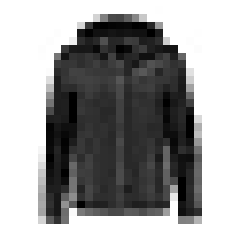

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

레이블은 0에서 9까지 (uint8로 표현된) 클래스 아이디입니다:

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

클래스 이름은 다음과 같습니다:

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

훈련 세트에 있는 첫 번째 이미지는 코트입니다:

In [17]:
class_names[y_train[0]]

'Coat'

이 데이터셋에 있는 샘플 이미지를 몇 개 출력해 보죠:

그림 저장: fashion_mnist_plot


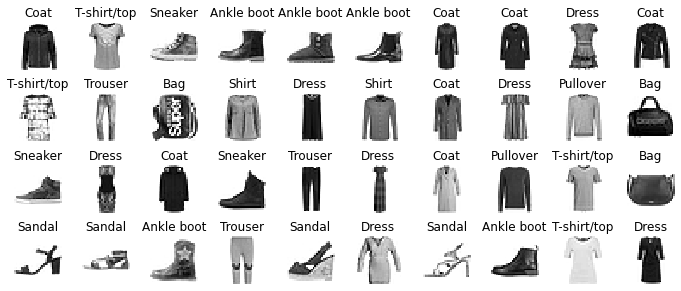

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [19]:
# keras로 모델 만드는 방법
# Sequential (Layer를 순서대로 쌓는 방법) -> 가장 편리하다. 
# Function API ( Layer들의 연결을 사용자가 조정)
# Subclassiong API (사용자가 클래스 만들어서 동적으로 생성)

# Sequential= keras의 모델 만드는 방법중 하나 -> Layer를 쌓는 방법
# Dense = 중간 (hidden)노드 들 몇개 만들것인지
# Flatten = input의 형태를 지정 -> 28 * 28의 형태를 1차원으로 바꿔줌 -> 784로 변경

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))# 특징이 28 * 28 가지이다. 
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))# 마지막 Dense는 y_train(0~9) 의 갯수와 맞춰줘야한다. 

In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.layers

In [23]:
# 모델의 구조를 볼 수 있다. 
# 모든 Dense가 연결되어있다. 
# 235500 = 784*300 + bias(자기자신만큼 : 300)
# 30100 = 300*100 + bias(자기자신만큼 : 100)
# Total params : 266,610 -> 26만개의 파라미터를 학습시켜야 한다. 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


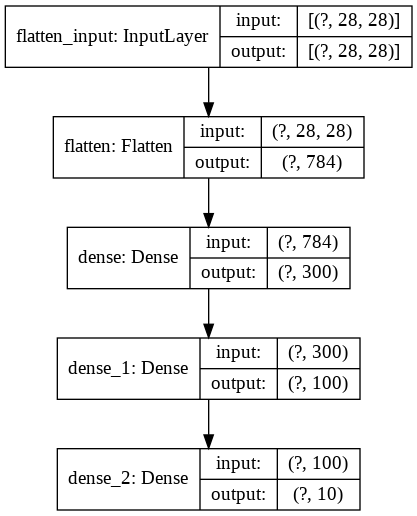

In [24]:
# 모델이 어떻게 구성되었는지 보여줌 

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
model.get_layer(hidden1.name) is hidden1

True

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

In [32]:
# model.compile = 앞에서 만든 모델의 파라미터들을 등록하는 과정
# 어떻게 학습시키는지에 대한 정보가 들어감
# loss를 최소화하는 것이 목표인데, 그때 어떤 함수를 사용할 것인지 정해준다. 
# sparse_categorical_crossentropy = Label이 0~9까지의 숫자로 되있을 경우 사용
# categorical_crossentropy = Label이 one-hot-encoding(0과1로만 나타난 것)으로 되있을 경우 사용
# optimizer =  최적화하는 것으로 , Stochastic Gradient Descent : SGD -> 확률적 경사 하강법 사용
#       갱신시킬 파라미터들의 현 기울기 값인 그래디언트를 구해내고, 
#       그것에 일정한 학습률을 곱하고, 기존 파라미터에 적용시키는 방식으로 갱신시킵니다
# metrics = 한 epock 수행시 어떤 유형으로 평가할 것인지 

model.compile(loss="sparse_categorical_crossentropy",# 분류문제이기 때문에 
              optimizer="sgd",
              metrics=["accuracy"])

위 코드는 다음과 같습니다:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [33]:
# epochs : 얼만큼 반복할 것인지 
# batch : 한번에 얼만큼 학습시킬 것인지 
# validation_data : 이 데이터를 기준으로 측정(정확도)해라 -> 한 epock 돌때마다 어떤것을 기준으로 metrics 평가할 것인지 
# loss: 0.7237 - accuracy: 0.7643 => 학습데이터로 평가
# val_loss: 0.5213 - val_accuracy: 0.8226 => validation으로 평가 
# 따라서 loss를 최소화하는게 목표이다. 

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3616 - val_accuracy:

In [34]:
# 학습된 모델이 가지고 있는 파라미터를 알 수 있음. 

history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [35]:
print(type(history.epoch), history.epoch)

<class 'list'> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [56]:
# loss값을 저장한다.
# 가장좋은 loss값을 꺼낼 수 있다. 

print(type(history.history), history.history.keys())
print(history.history['loss'])
print(np.min(history.history['loss']))


<class 'dict'> dict_keys(['loss', 'val_loss'])
[1.6418710947036743, 0.7046964764595032, 0.6345421075820923, 0.5977364182472229, 0.5706290006637573, 0.5472457408905029, 0.5287573933601379, 0.5130122303962708, 0.49915826320648193, 0.4874992370605469, 0.47773417830467224, 0.46876275539398193, 0.46150997281074524, 0.4547175168991089, 0.44877079129219055, 0.44347065687179565, 0.4388773739337921, 0.43465662002563477, 0.4306175410747528, 0.4273228049278259]
0.4273228049278259


In [37]:
# 더 편하게 보기 위해 pandas 이용한다.

import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.723703,0.764309,0.521318,0.8226
1,0.484193,0.831782,0.435322,0.8526
2,0.439064,0.845782,0.530424,0.7996
3,0.412309,0.856564,0.391589,0.8650
4,0.393937,0.862236,0.374512,0.8690


(0.0, 1.0)

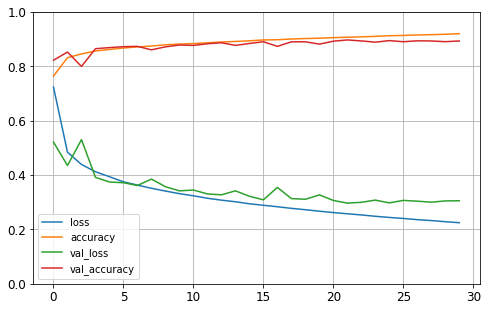

In [38]:
# df 시각화
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [39]:
# evaluate : 평가 -> test data와 target 주고 모델의 성능을 평가할 수 있음 -> predict와 비슷한 기능 

model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8822


[0.3381877839565277, 0.8822000026702881]

In [40]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)# 소수점이하 2자리까지 찍어라  

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
# 이거말고 밑에 코드로 진행해라 

y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [42]:
y_pred = np.argmax(model.predict(X_new), axis=-1)  # 위 대신 이것을 선호
y_pred

array([9, 2, 1])

In [43]:
# 예측한 데이터의 class_name을 알 수 있다. 
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_test[:3]   # true class label

array([9, 2, 1], dtype=uint8)

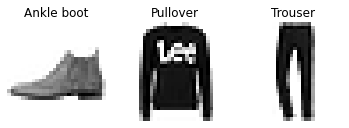

In [45]:
# visualize test samples
#plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)


### 회귀 MLP : California Housing Prices

캘리포니아 주택 데이터셋을 로드하여 나누고 스케일을 바꾸어 보겠습니다(2장에서 사용한 수정된 버전이 아니라 원본을 사용합니다):

In [46]:
# 새로운 데이터셋을 이용해서 학습 시작 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# 정규화해서 데이터를 넣어줌 -> 평균 0 분산 1로 스케일링 해줌 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
# 특징 input(8개)을 이용해서 output(30개)를 얻어낸 후 , 마지막으로 1개 추출한다.  
# output = hiddenlayer를 뜻함 
# 따라서 8개의 특징을 더 구체화한 뒤 출력할때는 다시 압축해서 1개 특징(target 갯수와 동일하게 )으로 출력해준다. 

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),# [1:] = 특징(target) 8개 출력
    keras.layers.Dense(1)
])

# mean_squared_error => 회귀문제이기 때문에 

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4875 - val_loss: 0.4656

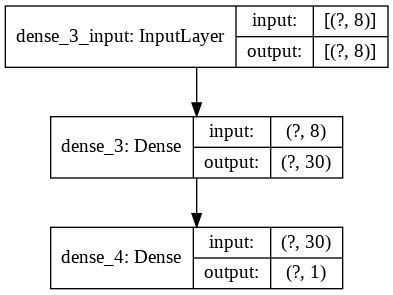

In [49]:
keras.utils.plot_model(model, show_shapes=True)

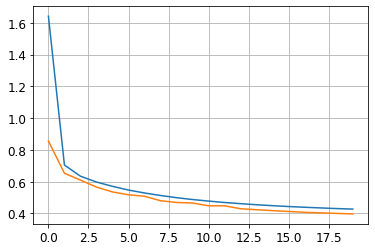

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
#plt.show()

In [51]:
y_pred

array([[0.38856646],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

# 함수형 API : 복잡한 레이어 연결 구조 표현 가능

모든 신경망 모델이 단순하게 순서대로 나열되지는 않습니다. 어떤 신경망은 매우 복잡한 구조를 가집니다. 여러 개의 입력이 있거나 여러 개의 출력이 있습니다. 예를 들어 와이드 & 딥 신경망([논문](https://ai.google/research/pubs/pub45413) 참조)은 입력의 전체 또는 일부를 출력층에 바로 연결합니다.  <img src="Fig.10-14 Wide_Deep_Network.PNG">

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

### California Housing Prices 데이터 계속 사용
### Wide & Deep Model

In [ ]:
# Function API 방법 시작 - keras로 모델 만드는 방법 3가지 중 한가지
# 마지막에 input과 output만 모델에 주면 된다. 
# concat = 특징갯수를 합하는 것, 8+30 = 38개의 특징을 가짐 


input_ = keras.layers.Input(shape=X_train.shape[1:])  # X_train.shaple=(11610, 8) -> 샘플갯수 11610, 특징갯수 8
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

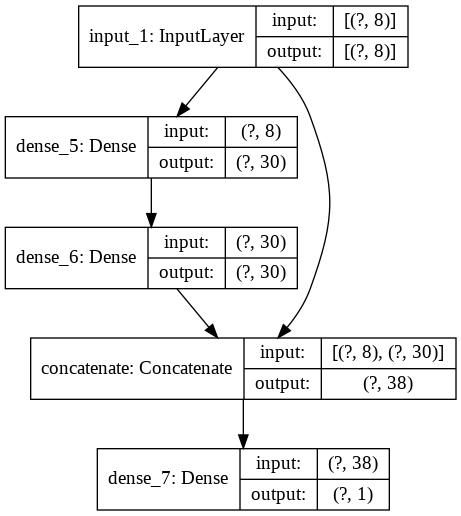

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4659 - val_loss: 0.4313

In [ ]:
mse_test = model.evaluate(X_test, y_test)
print('mse_test :', mse_test)

y_pred = model.predict(X_new)
print('X_new :', X_new.round(3))
print('y_pred :', y_pred.round(3))

162/162 [==============================] - 0s 901us/step - loss: 0.4032
mse_test : 0.4031672477722168
X_new : [[-1.158 -0.287 -0.496 -0.166 -0.029  0.389  0.194  0.287]
 [-0.713  0.109 -0.163  0.202  0.128 -0.118 -0.237  0.062]
 [-0.216  1.849 -0.58   0.185 -0.104 -0.677  1.009 -1.427]]
y_pred : [[0.47 ]
 [1.874]
 [3.38 ]]


### 입력을 나누어 보내는 경우
(특징 0에서 4까지) 5개 : Wide 경로 <p>
(특성 2에서 7까지) 6개 : Deep 경로에 전달 <p>
- 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달됨

In [ ]:
# 입력을 2개로 나눠서 진행할 수 도 있다.
#

input_A = keras.layers.Input(shape=[5], name="wide_input")  # 5개 값을 받을 것이라고만 알려줌.  값은 fit() 때 넣음
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

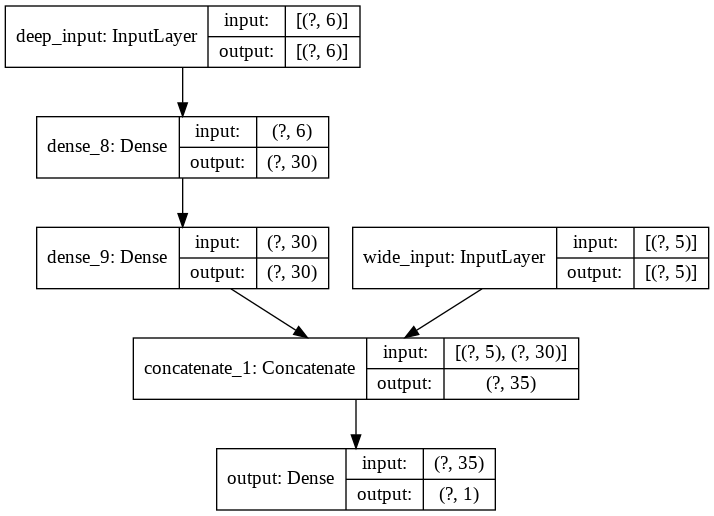

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7643 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7584 - val_loss: 0.6710
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6584 - val_loss: 0.6169
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6023 - val_loss: 0.5710
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5663 - val_loss: 0.5420
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5380 - val_loss: 0.5176
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5187 - val_loss: 0.5065
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5025 - val_loss: 0.4790
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4889 - val_loss: 0.4564
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4781 - val_loss: 0.4451

### 출력을 여러개 하는 보내는 경우
규제를 넣기위해 보조 출력을 추가했음 (가중치는 메인 90%, 보조 10%)

In [ ]:
# 출력을 여러개 내서 모델의 학습에 이용할 수 있다. 

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

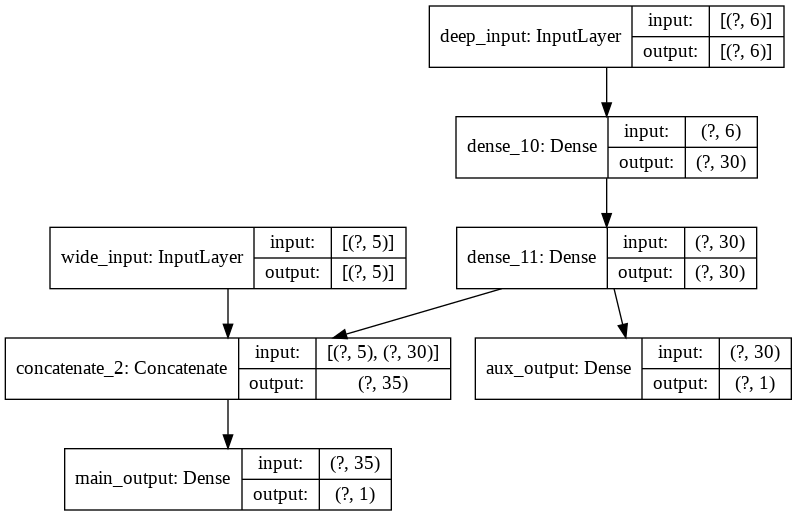

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# loss_weights=[0.9, 0.1] = 앞에 output의 결과를 90% 반영하고, 뒤의 output 결과를 10%반영해서 결과 출력한다. 
# 규제를 넣기 위해서 사용한다,

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7641 - main_output_loss: 2.2851 - aux_output_loss: 7.0750 - val_loss: 1.8045 - val_main_output_loss: 1.3439 - val_aux_output_loss: 5.9498
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1723 - main_output_loss: 0.8243 - aux_output_loss: 4.3038 - val_loss: 0.9344 - val_main_output_loss: 0.6979 - val_aux_output_loss: 3.0635
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8590 - main_output_loss: 0.6713 - aux_output_loss: 2.5486 - val_loss: 0.7760 - val_main_output_loss: 0.6271 - val_aux_output_loss: 2.1165
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7317 - main_output_loss: 0.6136 - aux_output_loss: 1.7945 - val_loss: 0.6953 - val_main_output_loss: 0.5732 - val_aux_output_loss: 1.7940
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6658 - main_output_loss: 0.5760 - aux_output_loss: 1.4745 - val_loss

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4622 - main_output_loss: 0.4211 - aux_output_loss: 0.8314


# 서브클래싱 API : 동적 모델이 필요한 경우
Input Layer 없음.  call()에 매개변수로 입력을 넘겨줌. <p>
프로그램 자유도가 높음 : call()안에 조건문, 저수준 api 사용할 수 있음, 디버깅 편함 <p>
<font color=red> **모델을 저장/복사할 수 없음** <color>

In [ ]:
# Subclassiong API 시작 -> keras로 모델 만드는 방법중 하나 -> 동적인 방법 -> 
# 장점 : 자유도가 가장 좋다 , 디버그 디버깅 좋다. 
# 단점 : 속도느리다. 모델 저장 못한다. 
# 모델 생성을 함수화 할 수 있다. 
# __init__은 생성시 모델의 형태를 만들어 주는 함수로, 한번만 실행된다. 
# call 함수는 모델이 학습할 때마다 실행된다. 

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.6811 - output_1_loss: 2.3824 - output_2_loss: 5.3690 - val_loss: 4.0827 - val_output_1_loss: 3.6804 - val_output_2_loss: 7.7037
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0888 - output_1_loss: 0.7882 - output_2_loss: 3.7939 - val_loss: 1.8117 - val_output_1_loss: 0.9127 - val_output_2_loss: 9.9026
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8406 - output_1_loss: 0.6446 - output_2_loss: 2.6052 - val_loss: 1.6652 - val_output_1_loss: 0.6103 - val_output_2_loss: 11.1593
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7409 - output_1_loss: 0.5967 - output_2_loss: 2.0386 - val_loss: 1.6267 - val_output_1_loss: 0.5937 - val_output_2_loss: 10.9233
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6847 - output_1_loss: 0.5645 - output_2_loss: 1.7665 - val_loss: 1.4905 - val_output_1_loss: 0.5594 - val_

In [ ]:
model = WideAndDeepModel(30, activation="relu")

# 저장과 복원 : Subclassing API 는 안됨

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.0964 - val_loss: 1.5744
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8149 - val_loss: 0.7112
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7126 - val_loss: 0.6591
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6645 - val_loss: 0.6053
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6277 - val_loss: 0.5696
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5952 - val_loss: 0.5390
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5674 - val_loss: 0.5166
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5426 - val_loss: 0.4906
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5197 - val_loss: 0.4713
Epoch 10/10
162/162 [==============================] - 0s 909us/step - loss: 0.4919


In [ ]:
model.save("my_keras_model.h5")  # hdf5 format.  saved_format=tf하면 SavedModel format

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
model.predict(X_new)

array([[0.54002357],
       [1.6505971 ],
       [3.0098243 ]], dtype=float32)

In [ ]:
model.save_weights("my_keras_weights.ckpt")

In [ ]:
model.load_weights("my_keras_weights.ckpt")

# 훈련 과정에서 콜백 사용하기

In [ ]:
# 콜백 = 그 상황이 일어났을 때 지정해놓은 함수를 부른다. 
# 모델 fit시 콜백 지정 
# callbacks=[checkpoint_cb, early_stopping_cb])

# keras.callbacks.ModelCheckpoint 를 사용해서 값을 저장한다 . -> 가장 좋은값만 저장해라
# EarlyStopping = 오차가 전보다 커졌을때, patience 번 만큼 커졌을경우 학습을 중단할수 있도록 하는 함수 


keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4382


In [ ]:
# EarlyStopping = 오차가 전보다 커졌을때, patience 번 만큼 커졌을경우 학습을 중단할수 있도록 하는 함수 

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

346/363 [===========================>..] - ETA: 0s - loss: 0.3272
val/train: 1.08
363/363 [==============================] - 1s 4ms/step - loss: 0.3302 - val_loss: 0.3559


# 텐서보드

In [ ]:
# 텐서보드 =  텐서 플로우의 장점으로, 학습하는 과정을 그래프로 저장해서 볼 수 있다. 

root_logdir = os.path.join(os.curdir, "my_logs")

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_11_14-01_49_00'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 7.8215WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 

텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

그다음 웹 브라우저를 열고 [localhost:6006](http://localhost:6006)에 접속하면 텐서보드를 사용할 수 있습니다. 사용이 끝나면 터미널에서 Ctrl-C를 눌러 텐서보드 서버를 종료하세요.

또는 다음처럼 텐서보드의 주피터 확장을 사용할 수 있습니다(이 명령은 텐서보드가 로컬 컴퓨터에 설치되어 있어야 합니다):

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

모델 하나 더 만들어 tensorboard에서 비교

In [ ]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_11_14-02_05_30'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))  # lr 달라졌음

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 302.8509
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================

텐서보드에 실행 결과가 2개 있습니다. 학습 곡선을 비교해 보세요.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

# 참고 : 하이퍼파라미터 튜닝

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4060 - val_l

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3402


In [ ]:
y_pred = keras_reg.predict(X_new)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

**경고**: 다음 셀은 훈련이 끝날 때 에러가 납니다. 이는 최근 사이킷런의 변화때문에 생긴 [케라스 이슈 #13586](https://github.com/keras-team/keras/issues/13586) 때문입니다. 이 이슈를 해결하기 위한 [풀 리퀘스트 #13598](https://github.com/keras-team/keras/pull/13598)가 있으므로 곧 해결될 것 같습니다.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 4ms/step - loss: 3.5557 - val_loss: 1.8752
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3347 - val_loss: 0.9522
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8591 - val_loss: 0.7820
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7360 - val_loss: 0.7249
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6930 - val_loss: 0.6994
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6668 - val_loss: 0.9118
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6514 - val_loss: 0.8495
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6381 - val_loss: 0.8605
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6276 - val_loss: 0.6524
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6125 - val_loss: 0.8619
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.4s remaining:    0.0s


242/242 [==============================] - 1s 4ms/step - loss: 3.5605 - val_loss: 23.0855
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.4777 - val_loss: 10.8387
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0149 - val_loss: 4.4392
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8729 - val_loss: 1.5338
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8027 - val_loss: 0.7192
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7542 - val_loss: 1.2046
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7160 - val_loss: 2.4524
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6847 - val_loss: 4.1421
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6588 - val_loss: 5.9820
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6371 - val_loss: 7.7654

242/242 [==============================] - 1s 3ms/step - loss: 1.6846 - val_loss: 282.6046
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 2.5718 - val_loss: 656.3253
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 12.3829 - val_loss: 1380.0121
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 14.8443 - val_loss: 2817.4539
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 7.4320 - val_loss: 4499.3813
Epoch 11/100
121/121 [==============================] - 0s 2ms/step - loss: 11.0521
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   9.7s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 2.5089 - val_loss: 2.6033
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0793 - val_loss: 1.0424
Epoch 3/100
242/242 [==============================]

242/242 [==============================] - 1s 4ms/step - loss: 0.4612 - val_loss: 0.5264
Epoch 19/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4549 - val_loss: 0.4894
Epoch 20/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4493 - val_loss: 0.4711
Epoch 21/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4442 - val_loss: 0.4525
Epoch 22/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4395 - val_loss: 0.4467
Epoch 23/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4352 - val_loss: 0.4404
Epoch 24/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4313 - val_loss: 0.4333
Epoch 25/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4276 - val_loss: 0.4302
Epoch 26/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4242 - val_loss: 0.4284
Epoch 27/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4209 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.3800 - val_loss: 0.4178
Epoch 59/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3790 - val_loss: 0.4166
Epoch 60/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3779 - val_loss: 0.3910
Epoch 61/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3772 - val_loss: 0.4094
Epoch 62/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3763 - val_loss: 0.4363
Epoch 63/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3757 - val_loss: 0.4026
Epoch 64/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3737
[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  59.8s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 2.4720 - val_loss: 7.9723
Epoch 2/100
242/242 [==============================] - 1s 4ms/s

Epoch 1/100
242/242 [==============================] - 1s 5ms/step - loss: 3.7641 - val_loss: 28.0492
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 2.0504 - val_loss: 43.0472
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.6124 - val_loss: 37.0128
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 1.3603 - val_loss: 28.7538
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 1.1689 - val_loss: 20.6120
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0259 - val_loss: 14.6245
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9261 - val_loss: 10.5960
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8594 - val_loss: 7.2861
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8137 - val_loss: 5.1836
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7810 -

242/242 [==============================] - 1s 4ms/step - loss: 0.4336 - val_loss: 0.4532
Epoch 50/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4322 - val_loss: 0.4549
Epoch 51/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4307 - val_loss: 0.4534
Epoch 52/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4295 - val_loss: 0.4593
Epoch 53/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4281 - val_loss: 0.4535
Epoch 54/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4269 - val_loss: 0.4484
Epoch 55/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4255 - val_loss: 0.4489
Epoch 56/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4244 - val_loss: 0.4465
Epoch 57/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4232 - val_loss: 0.4489
Epoch 58/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4221 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 2.0333 - val_loss: 13.7380
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6240 - val_loss: 10.0594
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7131 - val_loss: 41.2693
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1121 - val_loss: 74.9048
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9784 - val_loss: 205.5686
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 1.9726 - val_loss: 246.7374
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 2.5115 - val_loss: 388.8353
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 5.9673 - val_loss: 620.5347
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 6.9990 - val_loss: 919.7248
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 4

Epoch 19/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3703 - val_loss: 0.4295
Epoch 20/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3672 - val_loss: 0.3458
Epoch 21/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3699 - val_loss: 0.3828
Epoch 22/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3668 - val_loss: 0.3409
Epoch 23/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3623 - val_loss: 0.3553
Epoch 24/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3606 - val_loss: 0.4287
Epoch 25/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3599 - val_loss: 0.3361
Epoch 26/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3584 - val_loss: 0.3479
Epoch 27/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3576 - val_loss: 0.4178
Epoch 28/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3557

242/242 [==============================] - 1s 4ms/step - loss: 0.4466 - val_loss: 0.4411
Epoch 63/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4440 - val_loss: 0.4392
Epoch 64/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4418 - val_loss: 0.4341
Epoch 65/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4394 - val_loss: 0.4314
Epoch 66/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4371 - val_loss: 0.4299
Epoch 67/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4349 - val_loss: 0.4278
Epoch 68/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4327 - val_loss: 0.4237
Epoch 69/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4306 - val_loss: 0.4218
Epoch 70/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4285 - val_loss: 0.4200
Epoch 71/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4266 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.6420 - val_loss: 0.6199
Epoch 13/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6325 - val_loss: 0.6066
Epoch 14/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6235 - val_loss: 0.5952
Epoch 15/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6150 - val_loss: 0.5855
Epoch 16/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6070 - val_loss: 0.5761
Epoch 17/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5992 - val_loss: 0.5671
Epoch 18/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5915 - val_loss: 0.5590
Epoch 19/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5841 - val_loss: 0.5515
Epoch 20/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5769 - val_loss: 0.5445
Epoch 21/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5697 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.3803 - val_loss: 0.3905
Epoch 34/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3798 - val_loss: 0.3893
Epoch 35/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3790 - val_loss: 0.3876
Epoch 36/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3775 - val_loss: 0.3916
Epoch 37/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3769 - val_loss: 0.3831
Epoch 38/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3762 - val_loss: 0.3875
Epoch 39/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3747 - val_loss: 0.3847
Epoch 40/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3750 - val_loss: 0.3846
Epoch 41/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3744 - val_loss: 0.3842
Epoch 42/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3730 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.4043 - val_loss: 0.4355
Epoch 12/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3994 - val_loss: 0.4276
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3968 - val_loss: 0.4761
Epoch 14/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3953 - val_loss: 0.5445
Epoch 15/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3922 - val_loss: 0.5613
Epoch 16/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3886 - val_loss: 0.6763
Epoch 17/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3861 - val_loss: 0.6692
Epoch 18/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3845 - val_loss: 0.7573
Epoch 19/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3963
[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  17.5s
[CV] learning_rate=0.00515328633

Epoch 21/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6146 - val_loss: 20.4378
Epoch 22/100
121/121 [==============================] - 0s 2ms/step - loss: 1.0973
[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  18.5s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 6.1564 - val_loss: 7.6683
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 4.4886 - val_loss: 4.9412
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 3.3699 - val_loss: 3.3299
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 2.6029 - val_loss: 2.3535
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 2.0673 - val_loss: 1.7864
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 1.6878 - val_loss: 1.4390
Epoch 7/100
242/242 [==============================] -

242/242 [==============================] - 1s 4ms/step - loss: 0.3211 - val_loss: 0.3412
Epoch 51/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3199 - val_loss: 0.3399
Epoch 52/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3188 - val_loss: 0.3329
Epoch 53/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3189 - val_loss: 0.3266
Epoch 54/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3178 - val_loss: 0.3180
Epoch 55/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3160 - val_loss: 0.3241
Epoch 56/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3162 - val_loss: 0.3195
Epoch 57/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3148 - val_loss: 0.3322
Epoch 58/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3139 - val_loss: 0.3240
Epoch 59/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3134 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.4235 - val_loss: 0.5528
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4125 - val_loss: 0.4217
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4079 - val_loss: 0.3978
Epoch 11/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3958 - val_loss: 0.7642
Epoch 12/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3934 - val_loss: 0.3953
Epoch 13/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3853 - val_loss: 0.3690
Epoch 14/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3805 - val_loss: 0.6782
Epoch 15/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3793 - val_loss: 0.5137
Epoch 16/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3750 - val_loss: 1.5716
Epoch 17/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3863 - val_loss: 1

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 17.8min finished


363/363 [==============================] - 1s 4ms/step - loss: 0.9562 - val_loss: 7.9910
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6345 - val_loss: 4.4949
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5106 - val_loss: 0.4376
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4426 - val_loss: 0.4602
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4217 - val_loss: 0.4209
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4041 - val_loss: 0.4768
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3956 - val_loss: 0.4360
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3872 - val_loss: 0.3768
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3793 - val_loss: 0.4160
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3748 - val_loss: 0.4245
E

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f12e03d2b70>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f127464db38>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_trai

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [ ]:
rnd_search_cv.best_score_

-0.34994881351788837

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3227


-0.32268083095550537

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3227


0.32268083095550537

# <font color=red> **과제** <font>
없음.  기말 프로젝트 준비 바람